# FLIGHT PRICE PREDICTION

## Content

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here is the dataset with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

# Importing Dataset

In [1]:
import pandas as pd
train=pd.read_excel(r'C:\Datatrained Evaluation Phase projects\Flight_Ticket_Participant_Datasets\Data_Train.xlsx')
sample=pd.read_excel(r'C:\Datatrained Evaluation Phase projects\Flight_Ticket_Participant_Datasets\Sample_submission.xlsx')
test=pd.read_excel(r'C:\Datatrained Evaluation Phase projects\Flight_Ticket_Participant_Datasets\Test_set.xlsx')

In [2]:
# Concatinating sample with test
test=pd.concat([test,sample],axis=1)

In [3]:
print(train.shape)
train.head()

(10683, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
print(test.shape)
test.head()

(2671, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934


In [5]:
# Checking the percentage of train data
train.shape[0]/(train.shape[0]+test.shape[0])*100

79.99850232140183

In [6]:
# Concating test with train and making the dataset full
fp=pd.concat([train,test])
print(fp.shape)
fp

(13354, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,14046
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,14086
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,22720
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,23544


In [7]:
fp.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# About the columns

1. Airline:

The name of the airline.

2. Date_of_Journey:

The date of the journey

3. Source:

The source from which the service begins.

4. Destination:

The destination where the service ends.

5. Route:

The route taken by the flight to reach the destination.

6. Dep_Time:

The time when the journey starts from the source.

7. Arrival_Time:

Time of arrival at the destination.

8. Duration:

Total duration of the flight.

9. Total_Stops:

Total stops between the source and destination.

10. Additional_Info:

Additional information about the flight

11. Price:

The price of the ticket

In [8]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13354 non-null  object
 1   Date_of_Journey  13354 non-null  object
 2   Source           13354 non-null  object
 3   Destination      13354 non-null  object
 4   Route            13353 non-null  object
 5   Dep_Time         13354 non-null  object
 6   Arrival_Time     13354 non-null  object
 7   Duration         13354 non-null  object
 8   Total_Stops      13353 non-null  object
 9   Additional_Info  13354 non-null  object
 10  Price            13354 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.2+ MB


In [9]:
# Checking null values
fp.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

**Route and Total_Stops have 1 null value each**

In [10]:
train[train['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
train[train['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [12]:
# We are dropping the above row because null values of both Route and Total_Stops are present in same row
fp.dropna(axis=0, how='any', inplace=True)

In [13]:
# Checking rows and columns of dataset
fp.shape

(13353, 11)

In [14]:
fp.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

**No null values are present now**

## Exploratory Data Analysis

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Checking rows and columns of dataset
fp.shape

(13353, 11)

In [17]:
fp.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


**We are adding 3 new columns "Journey_Month", "Journey_Day" and "Journey_Year", where month are in numeric form, 1 in month implies 'January'.**

In [18]:
import datetime
dt=datetime.datetime.now()
fp['Date_of_Journey']=pd.to_datetime(fp['Date_of_Journey'])
fp['Journey_Month']=fp['Date_of_Journey'].dt.month
fp['Journey_Day']=fp['Date_of_Journey'].dt.day
fp['Journey_Year']=fp['Date_of_Journey'].dt.year
fp.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [19]:
# dropping Date_of_Journey column because it is of no use now
fp.drop(['Date_of_Journey'],axis=1, inplace=True)

In [20]:
fp.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [21]:
fp['Dep_Time']=pd.to_datetime(fp['Dep_Time'])
# Extracting Departure Hours
fp['Dep_Hour']=fp['Dep_Time'].dt.hour

# Extracting Departure Minutes
fp['Dep_Min']=fp['Dep_Time'].dt.minute

# Dropping Dep_Time column because it is of no use now
fp.drop(['Dep_Time'],axis=1,inplace=True)

In [22]:
fp.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Journey_Year,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [23]:
fp['Arrival_Time']=pd.to_datetime(fp['Arrival_Time'])
# Extracting Arrival Hours
fp['Arrival_Hour']=fp['Arrival_Time'].dt.hour

# Extracting Arrival Minutes
fp['Arrival_Min']=fp['Arrival_Time'].dt.minute

# Dropping Arrival_Time column because it is of no use now
fp.drop(['Arrival_Time'],axis=1,inplace=True)

In [24]:
fp.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [25]:
# Extracting hour and minutes from Duartion

# Assigning and converting Duartion column into list
duration = list(fp["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:                  # Checking if Duration contains only hour or minute
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"    # Adds 0 minute
        else:
            duration[i]= "0h " + duration[i]           # Adds 0 hour
            
            
duration_hour = []
duration_min = []

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = "h")[0]))
    duration_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [26]:
# Adding above lists to the fp dataframe
fp['Duration_Hour']=duration_hour
fp['Duration_Min']=duration_min

# Dropping column Duration beacuse it is of new use
fp.drop(['Duration'], axis=1, inplace=True)

In [27]:
fp.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [28]:
# checking frequency of all unique values of Additional_info
fp['Additional_Info'].value_counts()

No info                         10492
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
2 Long layover                      1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

In [29]:
# we'll drop 'Route' and 'Additional_info' because Route is covered in total stops, source and destination column and Additional info contains mostly no info
fp.drop(['Route', 'Additional_Info'],axis=1, inplace=True)

In [30]:
fp.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_Month,Journey_Day,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,7,25


Unique Values : ['Air Asia' 'Air India' 'GoAir' 'IndiGo' 'Jet Airways'
 'Jet Airways Business' 'Multiple carriers'
 'Multiple carriers Premium economy' 'SpiceJet' 'Trujet' 'Vistara'
 'Vistara Premium economy']
Frequency Values : [405, 2191, 240, 2564, 4746, 8, 1543, 16, 1026, 1, 608, 5]


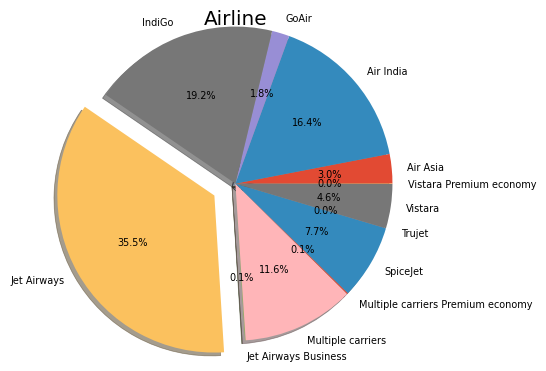

In [31]:
# Counting the frequency of unique elements
list_=fp['Airline']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for Airline

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

plt.style.use('ggplot')
labels=unique
sizes=frequency
plt.figure(figsize=(4,4),dpi=100)
plt.title('Airline')
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=1.3, textprops={'fontsize':7})
plt.show()

**Most people prefer Jet Airways and least people prefer Jet Airways Business, Multiple carries premium economy, vistara premium economy and trujet**

Unique Values : ['Banglore' 'Chennai' 'Delhi' 'Kolkata' 'Mumbai']
Frequency Values : [2752, 456, 5681, 3581, 883]


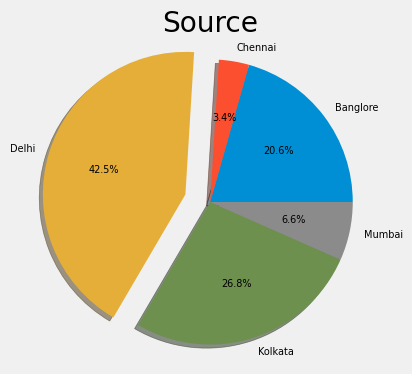

In [32]:
# Counting the frequency of unique elements
list_=fp['Source']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for Source

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

plt.style.use('fivethirtyeight')
labels=unique
sizes=frequency
plt.figure(figsize=(4,4),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=1.1, textprops={'fontsize':7})
plt.title('Source')
plt.show()

**Most travelers are from Delhi and least are from Chennai**

Unique Values : ['Banglore' 'Cochin' 'Delhi' 'Hyderabad' 'Kolkata' 'New Delhi']
Frequency Values : [3581, 5681, 1582, 883, 456, 1170]


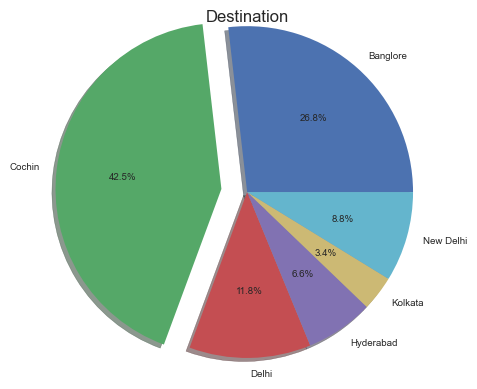

In [33]:
# Counting the frequency of unique elements
list_=fp['Destination']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for Destination

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

plt.style.use('seaborn')
labels=unique
sizes=frequency
plt.figure(figsize=(4,4),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=1.28, textprops={'fontsize':7})
plt.title('Destination')
plt.show()

**Most frequent destination of travelers is Cochin and least frequent is Kolkata**

Unique Values : ['1 stop' '2 stops' '3 stops' '4 stops' 'non-stop']
Frequency Values : [7056, 1899, 56, 2, 4340]


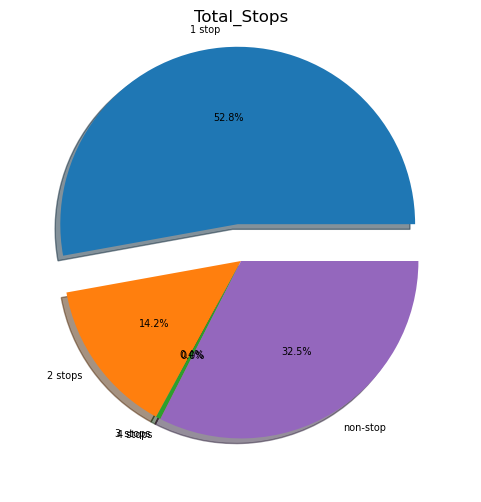

In [34]:
# Counting the frequency of unique elements
list_=fp['Total_Stops']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for Total_Stops

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

plt.style.use('default')
labels=unique
sizes=frequency
plt.figure(figsize=(6,6),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.96, textprops={'fontsize':7})
plt.title('Total_Stops')
plt.show()

**Most flights have just one stop and fery few flights have 3 and 4 stops**

In [35]:
fp.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Month,Journey_Day,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,21,35,4,45


Text(0.5, 1.0, 'Price Sourcewise')

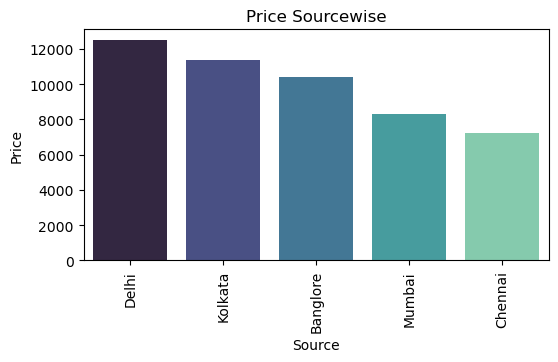

In [36]:
# Checking ticket price by Source
bySource=fp.groupby('Source').mean()
bySource.sort_values(by=['Price'],ascending=False,inplace=True)
plt.figure(figsize=(6,3))
sns.barplot(x=bySource.index,y=bySource['Price'],data=bySource,palette='mako')
plt.xticks(rotation=90)
plt.xlabel('Source')
plt.ylabel('Price')
plt.title('Price Sourcewise')

**From the above plot we can see that prices are highest where Delhi is the source and least where source is Chennai**

Text(0.5, 1.0, 'Price Total_Stopwise')

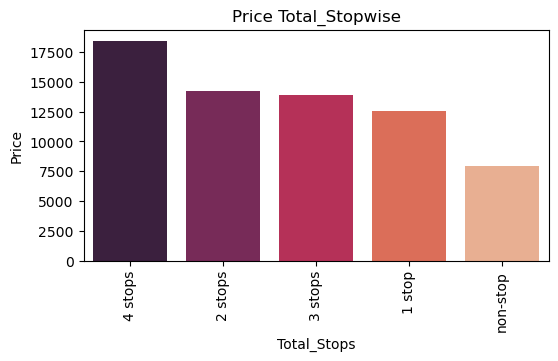

In [37]:
# Checking ticket price by Total_Stops
byTotal_Stops=fp.groupby('Total_Stops').mean()
byTotal_Stops.sort_values(by=['Price'],ascending=False,inplace=True)
plt.figure(figsize=(6,3))
sns.barplot(x=byTotal_Stops.index,y=byTotal_Stops['Price'],data=byTotal_Stops,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Total_Stops')
plt.ylabel('Price')
plt.title('Price Total_Stopwise')

**Prices high where stops are more and least where flight is non stop**

Text(0.5, 1.0, 'Price Airlinewise')

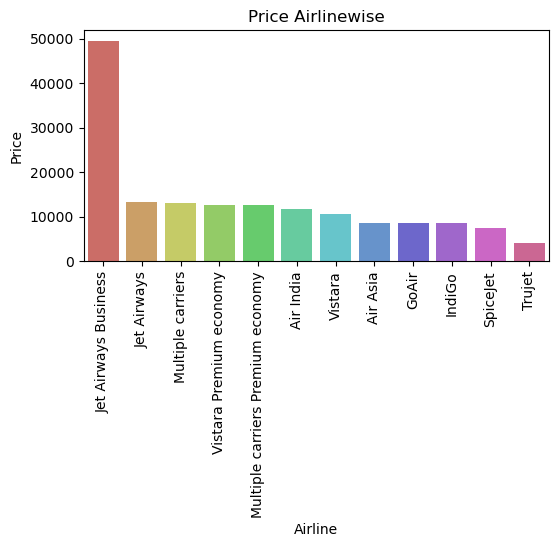

In [38]:
# Checking ticket price by Airline
byAirline=fp.groupby('Airline').mean()
byAirline.sort_values(by=['Price'],ascending=False,inplace=True)
plt.figure(figsize=(6,3))
sns.barplot(x=byAirline.index,y=byAirline['Price'],data=byAirline,palette='hls')
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Price Airlinewise')

**Jet Airways Business is the costliest flight and Trujet is cheapest flight**

In [39]:
fp.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Month,Journey_Day,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,21,35,4,45


In [40]:
# Checking Correlation
fp.corr()

,Price,Journey_Month,Journey_Day,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
Price,1.000000,0.014620,-0.119323,NaN,0.011119,-0.006697,0.028735,-0.054816,0.295591,-0.075542
Journey_Month,0.014620,1.000000,-0.263643,NaN,0.024015,0.002162,-0.001311,-0.028378,0.062768,-0.020086
Journey_Day,-0.119323,-0.263643,1.000000,NaN,-0.006530,-0.018570,0.000927,-0.019053,-0.042005,-0.002600
Journey_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Hour,0.011119,0.024015,-0.006530,NaN,1.000000,-0.026626,0.004267,0.067647,-0.001590,-0.023522
Dep_Min,-0.006697,0.002162,-0.018570,NaN,-0.026626,1.000000,0.044022,-0.018135,-0.013496,0.092227
Arrival_Hour,0.028735,-0.001311,0.000927,NaN,0.004267,0.044022,1.000000,-0.150638,0.054622,-0.119478
Arrival_Min,-0.054816,-0.028378,-0.019053,NaN,0.067647,-0.018135,-0.150638,1.000000,-0.075446,0.156399
Duration_Hour,0.295591,0.062768,-0.042005,NaN,-0.001590,-0.013496,0.054622,-0.075446,1.000000,-0.119597
Duration_Min,-0.075542,-0.020086,-0.002600,NaN,-0.023522,0.092227,-0.119478,0.156399,-0.119597,1.000000


<AxesSubplot:>

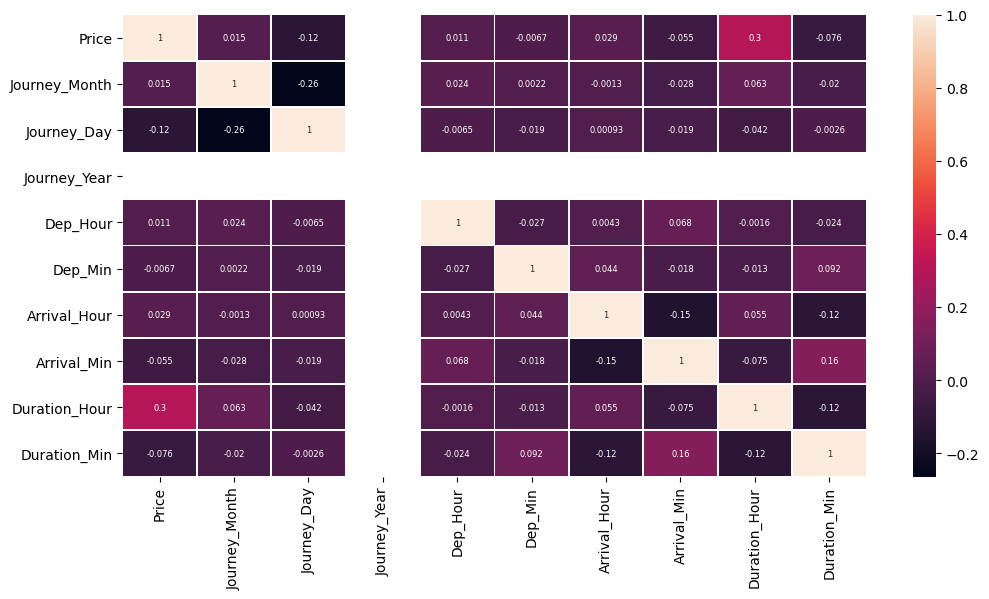

In [41]:
# plotting heatmap to see the correlation
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(fp.corr(),annot=True,linewidth=0.5,linecolor='White',annot_kws={'fontsize':6})

**Variables are not much correlated with price and some are negatively correlated also**

In [42]:
# Creating Variance Inflation Factor function
fp_=fp.copy()
fp_.drop(columns=["Airline", "Source", "Destination", "Total_Stops"],inplace=True)         # They are not numeric

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

fpc_=add_constant(fp_)
def fpc_vif():
    vif=pd.DataFrame()
    vif['Variables']=fpc_.columns
    vif['VIF Factor']=[variance_inflation_factor(fpc_.values,i)
                       for i in range(fpc_.shape[1])]
    return (vif)

In [43]:
fpc_vif()

,Variables,VIF Factor
0,Price,1.114534
1,Journey_Month,1.081189
2,Journey_Day,1.092230
3,Journey_Year,29.541080
4,Dep_Hour,1.007310
5,Dep_Min,1.013347
6,Arrival_Hour,1.037427
7,Arrival_Min,1.055739
8,Duration_Hour,1.114782
9,Duration_Min,1.059907


**Journey_year have highest variance inflation factor so we'll drop it**

In [44]:
fp.drop(['Journey_Year'],axis=1, inplace=True)

In [45]:
fp.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [46]:
fp.describe()

,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
count,13353.000000,13353.00000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000
mean,11302.006216,5.54924,12.551711,12.513518,24.505729,13.396390,24.664120,10.233730,28.340822
std,6452.999958,2.99880,8.760052,5.736407,18.832255,6.896299,16.560343,8.473885,16.905763
min,1759.000000,1.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6135.000000,3.00000,5.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,10262.000000,5.00000,6.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,14781.000000,6.00000,21.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,79512.000000,12.00000,27.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


## Outliers

<AxesSubplot:>

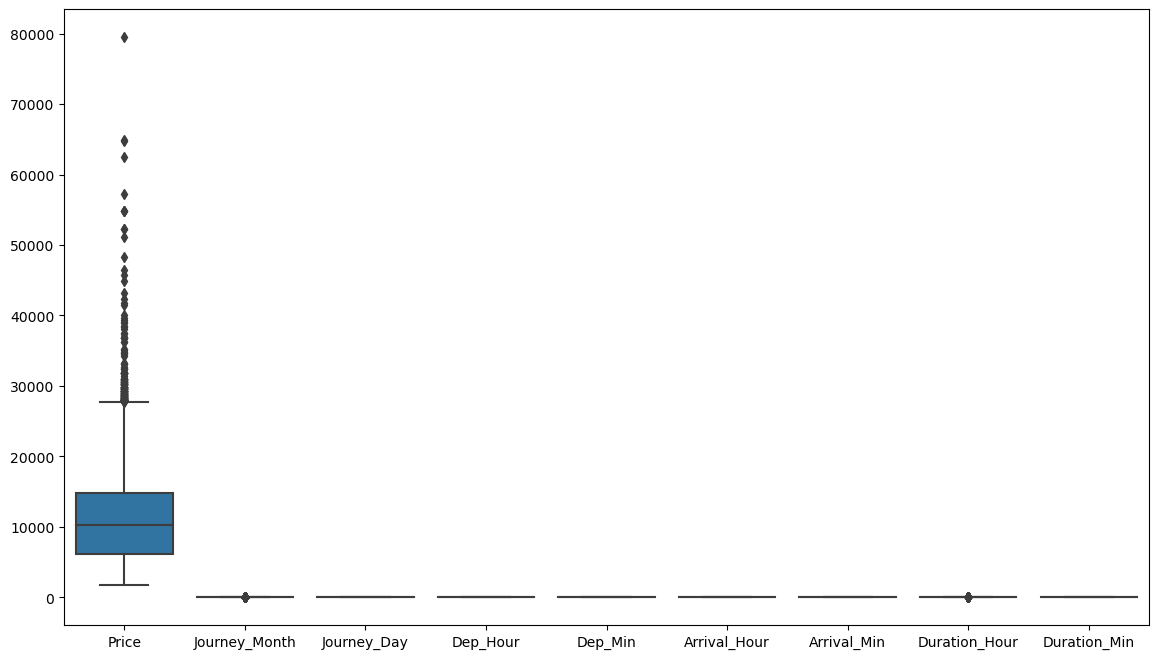

In [47]:
# Checking outliers by plotting dataset into boxplot
plt.figure(figsize=(14,8),dpi=100)
sns.boxplot(data=fp)

**Price, Journey_Month and Duration_Hour has outliers**

In [48]:
# Dropping Journey_Month and Duration_Hour
fp.drop(['Journey_Month','Duration_Hour'], axis=1,inplace=True)

In [49]:
fp.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,22,20,1,10,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,5,50,13,15,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,25,4,25,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,18,5,23,30,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,16,50,21,35,45


## Again checking the Outliers

<AxesSubplot:>

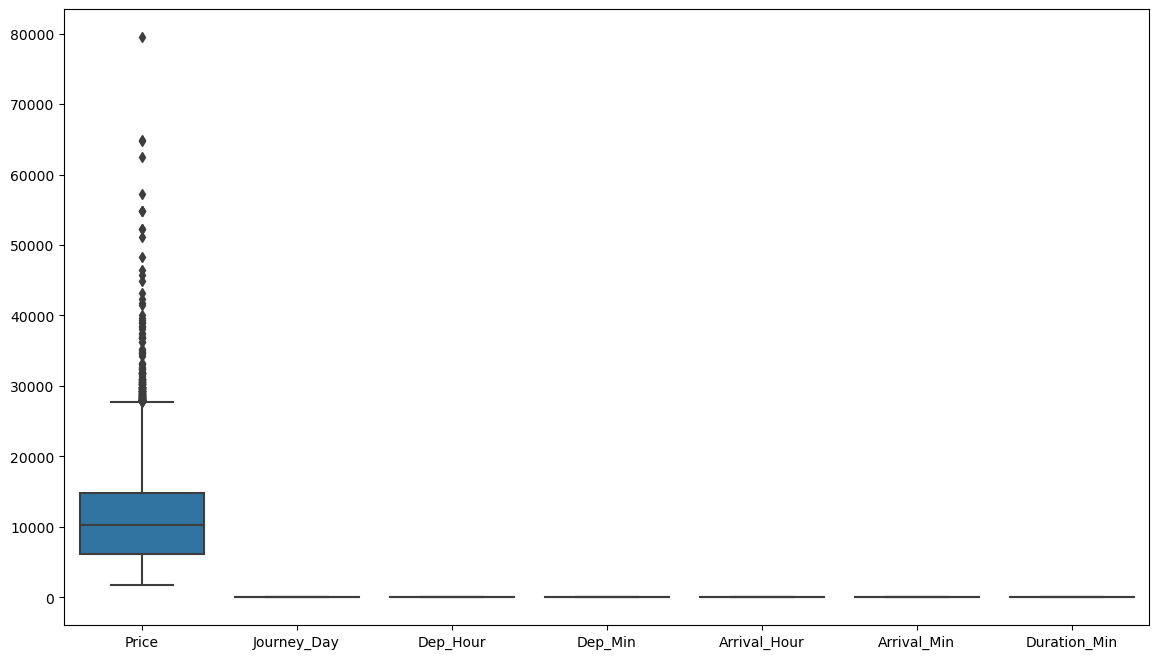

In [50]:
plt.figure(figsize=(14,8),dpi=100)
sns.boxplot(data=fp)

**We'll not drop Price beacause it is containing important data**

In [51]:
# Counting values fo different variables
print('\033[1m' + 'AIRLINE\n' + '\033[0m')
print(fp['Airline'].value_counts(),'\n')

print('\033[1m' + 'Source\n' + '\033[0m')
print(fp['Source'].value_counts(),'\n')

print('\033[1m' + 'Destination\n' + '\033[0m')
print(fp['Destination'].value_counts(),'\n')

print('\033[1m' + 'Total_Stops\n' + '\033[0m')
print(fp['Total_Stops'].value_counts())

AIRLINE

Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64 

Source

Delhi       5681
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64 

Destination

Cochin       5681
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64 

Total_Stops

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64


### Converting Categorical data of "fp" into integer

**Now we will convert the categorical variable like "Airline", "Source", "Destination" and "Total_Stops" into numeric.**

**We will apply get_dummies to varable "Airline", "Source" and "Destination", it will create equal number of columns with 1's and 0's, 1 will indicated that category is present and 0 will indicate absent**

**We will apply Label Encoding to variable "Total_Stops" because there are ordinal categorical data.**

In [52]:
airline_dummies=pd.get_dummies(fp.Airline,prefix='Airline')
airline_dummies

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0,1,0,0,0,0,0,0,0,0,0,0
2667,0,0,0,1,0,0,0,0,0,0,0,0
2668,0,0,0,0,1,0,0,0,0,0,0,0
2669,0,1,0,0,0,0,0,0,0,0,0,0


In [53]:
# concating the airline_dummies with the dataframe
fp=pd.concat([fp,airline_dummies],axis=1)
fp.drop(columns='Airline',inplace=True)
fp.head()

,Source,Destination,Total_Stops,Price,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Min,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,Banglore,New Delhi,non-stop,3897,24,22,20,1,10,50,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,2 stops,7662,5,5,50,13,15,25,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,2 stops,13882,6,9,25,4,25,0,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,1 stop,6218,5,18,5,23,30,25,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,1 stop,13302,3,16,50,21,35,45,...,0,1,0,0,0,0,0,0,0,0


In [54]:
source_dummies=pd.get_dummies(fp.Source,prefix='Source')
source_dummies

# concating the source_dummies with the dataframe
fp=pd.concat([fp,source_dummies],axis=1)
fp.drop(columns='Source',inplace=True)
fp.head()

,Destination,Total_Stops,Price,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Min,Airline_Air Asia,...,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,New Delhi,non-stop,3897,24,22,20,1,10,50,0,...,0,0,0,0,0,1,0,0,0,0
1,Banglore,2 stops,7662,5,5,50,13,15,25,0,...,0,0,0,0,0,0,0,0,1,0
2,Cochin,2 stops,13882,6,9,25,4,25,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Banglore,1 stop,6218,5,18,5,23,30,25,0,...,0,0,0,0,0,0,0,0,1,0
4,New Delhi,1 stop,13302,3,16,50,21,35,45,0,...,0,0,0,0,0,1,0,0,0,0


In [55]:
destination_dummies=pd.get_dummies(fp.Destination,prefix='Destination')
destination_dummies

# concating the Destination_dummies with the dataframe
fp=pd.concat([fp,destination_dummies],axis=1)
fp.drop(columns='Destination',inplace=True)
fp.head()

,Total_Stops,Price,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Min,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,non-stop,3897,24,22,20,1,10,50,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,5,5,50,13,15,25,0,1,...,0,0,1,0,1,0,0,0,0,0
2,2 stops,13882,6,9,25,4,25,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1 stop,6218,5,18,5,23,30,25,0,0,...,0,0,1,0,1,0,0,0,0,0
4,1 stop,13302,3,16,50,21,35,45,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
print(fp['Total_Stops'].value_counts())

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64


In [57]:
# We have to take care of categorical data in Total_Stops variables
fp.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

In [58]:
fp.head()

,Total_Stops,Price,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Min,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,22,20,1,10,50,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,5,50,13,15,25,0,1,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,6,9,25,4,25,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,5,18,5,23,30,25,0,0,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,3,16,50,21,35,45,0,0,...,0,0,0,0,0,0,0,0,0,1


**Now our categorical data in converted into numeric.**

## Model Creation for Price

In [59]:
fp.head()

,Total_Stops,Price,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Min,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,22,20,1,10,50,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,5,50,13,15,25,0,1,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,6,9,25,4,25,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,5,18,5,23,30,25,0,0,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,3,16,50,21,35,45,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
fp.shape

(13353, 31)

In [61]:
fp_train=fp[0:10683]

In [62]:
x=fp_train.drop(columns=['Price'])
y=fp_train[['Price']]

print(x.shape)
print(y.shape)

(10683, 30)
(10683, 1)


**We have created two variables containing Input data (x) and Output data (y).**

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=50)

**We've splitted our dataset into training and testing, where we have used our 80% of data for training and 20% of data for testing**

### Scaling x_train and x_test using Standard Scaler

In [64]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [65]:
# Importing linear Regression algorithm, mean absolute error, mean squared error and r2 score to make the prediction model and checking its accuracy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

**Making a function to calculate and print following features for the model : mean absolute error, mean squared error, r2 score.**

In [66]:
def results(actual,pred):
    mae=mean_absolute_error(actual,pred)
    mse=mean_squared_error(actual,pred)
    r2=r2_score(actual,pred)
    
    print('Mean Absolute Error :',mae,'\n')
    print('Mean Squared Error :',mse,'\n')
    print('r2 Score :',r2,'\n')

**Making a Cross Validation function**

In [67]:
from sklearn.model_selection import cross_val_score
def accuracy(model,x_train=x_train,y_train=y_train):
    accuracies=cross_val_score(estimator=model,X = x_train, y = y_train ,cv=10)
    print('Cross_val_Accuracy: {:.2f} %'.format(accuracies.mean()*100),'\n')
    print('Cross_val_Standard Deviation: {:.2f} %'.format(accuracies.std()*100),'\n')

### Linear Regression Model

**Creating Linear Regression Model, it'll fit the regression model on x_train and y_train and predict the x_test and store it in pred. We will print predicted Price and actual Price and outputs of the above functions**

In [68]:
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)

print('\033[1m' + 'LINEAR REGRESSION MODEL SUMMERY\n' + '\033[0m')
print('Predicted Price',pred)
print('\nActual Price\n',y_test)
print('\n')
results(y_test,pred)
accuracy(ln)

LINEAR REGRESSION MODEL SUMMERY

Predicted Price [[ 4218.03398475]
 [12182.03398475]
 [ 4730.03398475]
 ...
 [12218.03398475]
 [ 6094.03398475]
 [14614.03398475]]

Actual Price
        Price
6531    4804
9422   17266
8647    3540
9542   12898
10155   7503
...      ...
3740    3573
10504   6152
2303   12121
6923    4668
8080   24528

[2137 rows x 1 columns]


Mean Absolute Error : 1968.261829748626 

Mean Squared Error : 9109884.911964968 

r2 Score : 0.5661578880874467 

Cross_val_Accuracy: -28843180155473386272718848.00 % 

Cross_val_Standard Deviation: 86529540466420141638287360.00 % 



### Lasso Regression

**Creating Lasso Regression Model, it'll fit the regression model on x_train and y_train and predict the x_test and store it in pred_ls. We will print predicted Price and actual Price and outputs of the above functions**

In [69]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)

print('\033[1m' + 'LASSO REGRESSION MODEL SUMMERY\n' + '\033[0m')
print('Predicted Price',pred_ls)
print('\nActual Price\n',y_test)
print('\n')
results(y_test,pred_ls)
accuracy(ls)

LASSO REGRESSION MODEL SUMMERY

Predicted Price [ 4224.770819   12270.76529568  4517.6273804  ... 12168.61496386
  6012.27060651 14619.4105632 ]

Actual Price
        Price
6531    4804
9422   17266
8647    3540
9542   12898
10155   7503
...      ...
3740    3573
10504   6152
2303   12121
6923    4668
8080   24528

[2137 rows x 1 columns]


Mean Absolute Error : 1971.3066183846086 

Mean Squared Error : 9102549.049979463 

r2 Score : 0.5665072455038407 

Cross_val_Accuracy: 62.15 % 

Cross_val_Standard Deviation: 3.93 % 



## Gradient Boosting Regressor

**Creating Linear Regression Model, it'll fit the regression model on x_train and y_train and predict the x_test and store it in pred_gb. We will print predicted Price and actual Price and outputs of the above functions**

In [70]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)

print('\033[1m' + 'GRADIENT BOOSTING REGRESSOR MODEL SUMMERY\n' + '\033[0m')
print('Predicted Price',pred_gb)
print('\nActual Price\n',y_test)
print('\n')
results(y_test,pred_gb)
accuracy(gb)

GRADIENT BOOSTING REGRESSOR MODEL SUMMERY

Predicted Price [ 4670.80956873 14790.63742198  4532.87356149 ... 11755.93825115
  5293.43331811 22527.1604014 ]

Actual Price
        Price
6531    4804
9422   17266
8647    3540
9542   12898
10155   7503
...      ...
3740    3573
10504   6152
2303   12121
6923    4668
8080   24528

[2137 rows x 1 columns]


Mean Absolute Error : 1578.3138141617972 

Mean Squared Error : 6533679.719010842 

r2 Score : 0.688845091321305 

Cross_val_Accuracy: 72.74 % 

Cross_val_Standard Deviation: 2.57 % 



### Random Forest Regressor

**Creating Random Forest Regressor Model, it'll fit the Random Forest Regressor model on x_train and y_train and predict the x_test and store it in pred_rr. We will print predicted Price and actual Price and outputs of the above functions**

In [71]:
rr=RandomForestRegressor()
rr.fit(x_train, y_train)
pred_rr=rr.predict(x_test)

print('\033[1m' + 'RANDOM FOREST REGRESSOR MODEL SUMMERY\n' + '\033[0m')
print('Predicted Price',pred_rr)
print('\nActual Price\n',y_test)
print('\n')
results(y_test,pred_rr)
accuracy(rr)

RANDOM FOREST REGRESSOR MODEL SUMMERY

Predicted Price [ 4286.605      15416.16583333  4365.05833333 ... 10777.65775
  4678.0325     24382.34      ]

Actual Price
        Price
6531    4804
9422   17266
8647    3540
9542   12898
10155   7503
...      ...
3740    3573
10504   6152
2303   12121
6923    4668
8080   24528

[2137 rows x 1 columns]


Mean Absolute Error : 1355.0940663283911 

Mean Squared Error : 6146170.129066187 

r2 Score : 0.7072995482669848 

Cross_val_Accuracy: 74.31 % 

Cross_val_Standard Deviation: 4.26 % 



### We can see that the best Performing Model is Random Forest Regressor Model

### Model Saving

In [73]:
import pickle
filename='flight_price_model.pkl'
pickle.dump(rr,open(filename,'wb'))

**Random Forest Regressor Model is saved with the name "flight_price_model"**

## Conclusion

In [75]:
print('Predicted Result','\n', pred_rr)
print('Actual Result','\n', y_test)

Predicted Result 
 [ 4286.605      15416.16583333  4365.05833333 ... 10777.65775
  4678.0325     24382.34      ]
Actual Result 
        Price
6531    4804
9422   17266
8647    3540
9542   12898
10155   7503
...      ...
3740    3573
10504   6152
2303   12121
6923    4668
8080   24528

[2137 rows x 1 columns]


# THE END